In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
train_df=pd.read_csv(r"C:\Users\kishor\OneDrive\Desktop\train.csv")
test_df=pd.read_csv(r"C:\Users\kishor\OneDrive\Desktop\test.csv")
test_true=pd.read_csv(r"C:\Users\kishor\OneDrive\Desktop\gender_submission.csv")
#

In [3]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
test_true

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#cabin have too many insufficient data  and Name of passenger is insignificant
train_df.drop(columns=['Name','Cabin','PassengerId','Ticket'],inplace=True)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
test_df.drop(columns=['Name','Cabin','PassengerId','Ticket'],inplace=True)
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [9]:
train_df['Age'].fillna(train_df['Age'].mean(),inplace=True)
test_df['Age'].fillna(test_df['Age'].mean(),inplace=True)
train_df.info(),test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null

(None, None)

In [10]:
train_df=train_df.dropna()
test_df['Fare'].fillna(test_df['Fare'].mean(),inplace=True)
train_df.info(),test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    o

(None, None)

In [11]:
from sklearn.preprocessing import LabelEncoder
sex_type=LabelEncoder()
train_df['Sex']=sex_type.fit_transform(train_df['Sex'])
test_df['Sex']=sex_type.fit_transform(test_df['Sex'])

In [12]:
embarked_type=LabelEncoder()
train_df['Embarked']=embarked_type.fit_transform(train_df['Embarked'])
test_df['Embarked']=embarked_type.fit_transform(test_df['Embarked'])

In [13]:
bins=[0,10,25,50,100]
labels=['0','1','2','3']
train_df['Age_group']=pd.cut(train_df['Age'],bins=bins,labels=labels)
test_df['Age_group']=pd.cut(test_df['Age'],bins=bins,labels=labels)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_group
0,0,3,1,22.000000,1,0,7.2500,2,1
1,1,1,0,38.000000,1,0,71.2833,0,2
2,1,3,0,26.000000,0,0,7.9250,2,2
3,1,1,0,35.000000,1,0,53.1000,2,2
4,0,3,1,35.000000,0,0,8.0500,2,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2,2
887,1,1,0,19.000000,0,0,30.0000,2,1
888,0,3,0,29.699118,1,2,23.4500,2,2
889,1,1,1,26.000000,0,0,30.0000,0,2


In [14]:
age_type=LabelEncoder()
train_df['Age_group']=age_type.fit_transform(train_df['Age_group'])
test_df['Age_group']=age_type.fit_transform(test_df['Age_group'])
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_group
0,0,3,1,22.000000,1,0,7.2500,2,1
1,1,1,0,38.000000,1,0,71.2833,0,2
2,1,3,0,26.000000,0,0,7.9250,2,2
3,1,1,0,35.000000,1,0,53.1000,2,2
4,0,3,1,35.000000,0,0,8.0500,2,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2,2
887,1,1,0,19.000000,0,0,30.0000,2,1
888,0,3,0,29.699118,1,2,23.4500,2,2
889,1,1,1,26.000000,0,0,30.0000,0,2


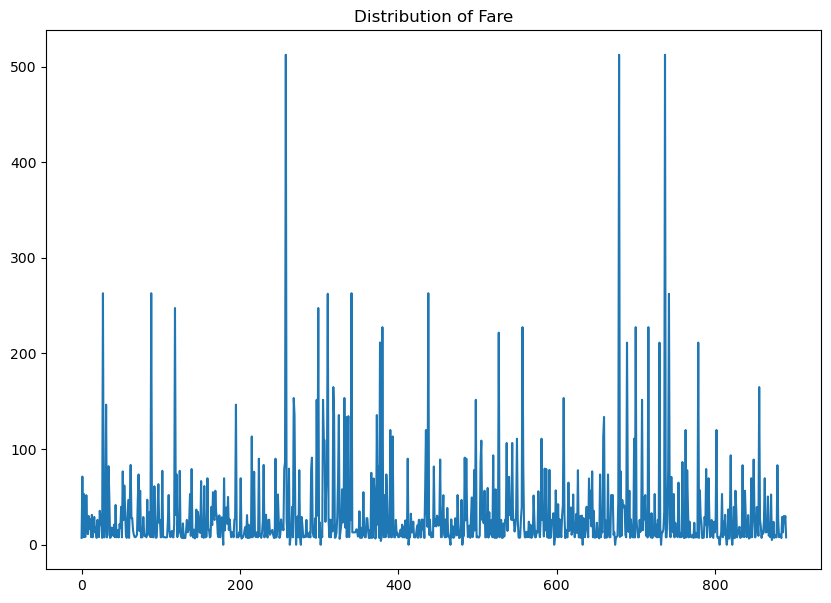

In [15]:
train_df['Fare'].plot(figsize = (10, 7))
plt.title("Distribution of Fare")
plt.show()

In [16]:
train_df['z_score']=(train_df.Fare-train_df.Fare.mean())/train_df.Fare.std()
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_group,z_score
0,0,3,1,22.0,1,0,7.2500,2,1,-0.499958
1,1,1,0,38.0,1,0,71.2833,0,2,0.788503
2,1,3,0,26.0,0,0,7.9250,2,2,-0.486376
3,1,1,0,35.0,1,0,53.1000,2,2,0.422623
4,0,3,1,35.0,0,0,8.0500,2,2,-0.483861


In [17]:
train_df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_group,z_score
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,8.890000e+02
mean,0.382452,2.311586,0.649044,29.653446,0.524184,0.382452,32.096681,1.535433,1.660292,1.318780e-16
std,0.486260,0.834700,0.477538,12.968366,1.103705,0.806761,49.697504,0.792088,0.714559,1.000000e+00
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.458409e-01
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000,1.000000,-4.869637e-01
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000,2.000000,-3.549973e-01
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000,2.000000,-2.206712e-02
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,3.000000,9.663111e+00


In [18]:
train_df=train_df[~(train_df['z_score']>1)]
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_group,z_score
0,0,3,1,22.000000,1,0,7.2500,2,1,-0.499958
1,1,1,0,38.000000,1,0,71.2833,0,2,0.788503
2,1,3,0,26.000000,0,0,7.9250,2,2,-0.486376
3,1,1,0,35.000000,1,0,53.1000,2,2,0.422623
4,0,3,1,35.000000,0,0,8.0500,2,2,-0.483861
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2,2,-0.384258
887,1,1,0,19.000000,0,0,30.0000,2,1,-0.042189
888,0,3,0,29.699118,1,2,23.4500,2,2,-0.173986
889,1,1,1,26.000000,0,0,30.0000,0,2,-0.042189


In [19]:
train_df.drop(columns='z_score',inplace=True)

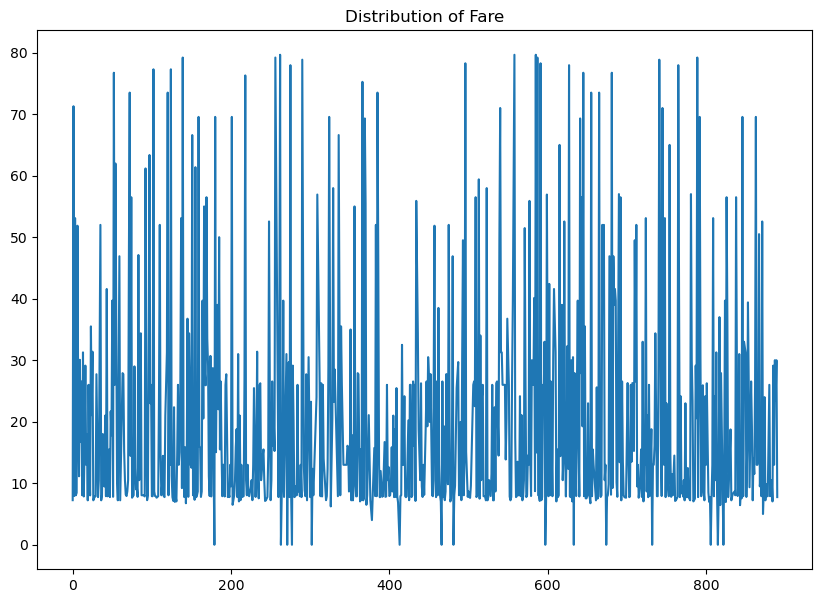

In [20]:
train_df['Fare'].plot(figsize = (10, 7))
plt.title("Distribution of Fare")
plt.show()

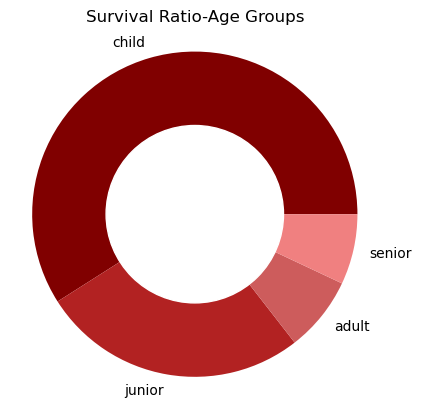

In [21]:
plt.pie(train_df[['Age_group']].value_counts(),labels=['child','junior','adult','senior'],radius=1.1,colors=['maroon','firebrick','indianred','lightcoral'])
center_circle=plt.Circle((0,0),0.6,color='white')
p=plt.gcf()
p.gca().add_artist(center_circle)
plt.title('Survival Ratio-Age Groups')
plt.show()

In [22]:
train_df.drop(columns='Age',inplace=True)
test_df.drop(columns='Age',inplace=True)

In [23]:
train_df.groupby(['Survived']).mean()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_group
Survived,,,,,,,
0,2.580827,0.851504,0.546992,0.308271,17.708778,1.665414,1.706767
1,2.148410,0.346290,0.441696,0.438163,26.044686,1.445230,1.558304


In [24]:
train_df.corr()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_group
Survived,1.000000,-0.268305,-0.513981,-0.044428,0.078311,0.219867,-0.139944,-0.098447
Pclass,-0.268305,1.000000,0.046808,0.117399,0.089031,-0.601735,0.073172,-0.269455
Sex,-0.513981,0.046808,1.000000,-0.121404,-0.274616,-0.153462,0.085703,0.124079
SibSp,-0.044428,0.117399,-0.121404,1.000000,0.425497,0.388158,0.076930,-0.247736
Parch,0.078311,0.089031,-0.274616,0.425497,1.000000,0.283423,0.040201,-0.265545
Fare,0.219867,-0.601735,-0.153462,0.388158,0.283423,1.000000,-0.098459,0.066947
Embarked,-0.139944,0.073172,0.085703,0.076930,0.040201,-0.098459,1.000000,-0.051340
Age_group,-0.098447,-0.269455,0.124079,-0.247736,-0.265545,0.066947,-0.051340,1.000000


<Axes: >

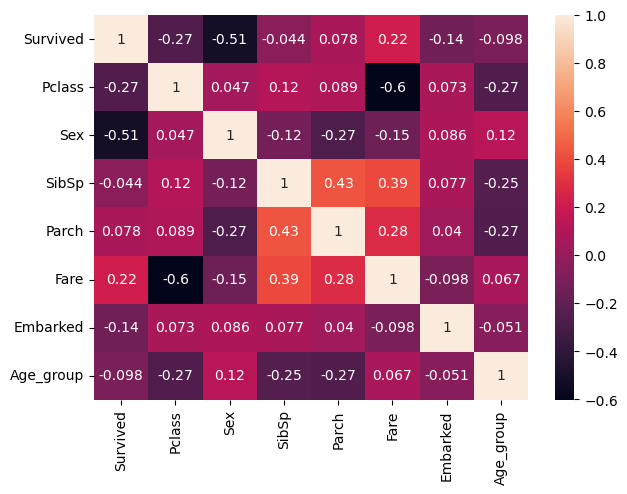

In [25]:
plt.figure(figsize=(7,5))
sn.heatmap(train_df.corr(),annot=True)

In [26]:
train_df[['Pclass']].value_counts()

Pclass
3         491
2         184
1         140
Name: count, dtype: int64

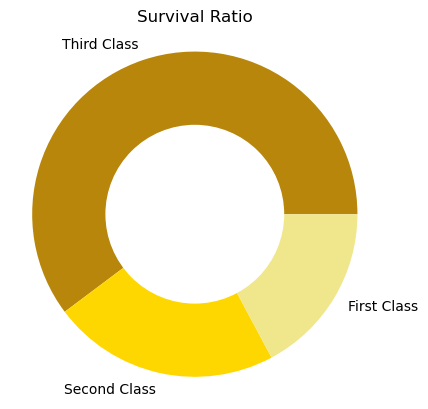

In [27]:
plt.pie(train_df[['Pclass']].value_counts(),labels=['Third Class','Second Class','First Class'],radius=1.1,colors=['darkgoldenrod','gold','khaki',])
center_circle=plt.Circle((0,0),0.6,color='white')
p=plt.gcf()
p.gca().add_artist(center_circle)
plt.title('Survival Ratio')
plt.show()

<Axes: xlabel='Pclass', ylabel='Fare'>

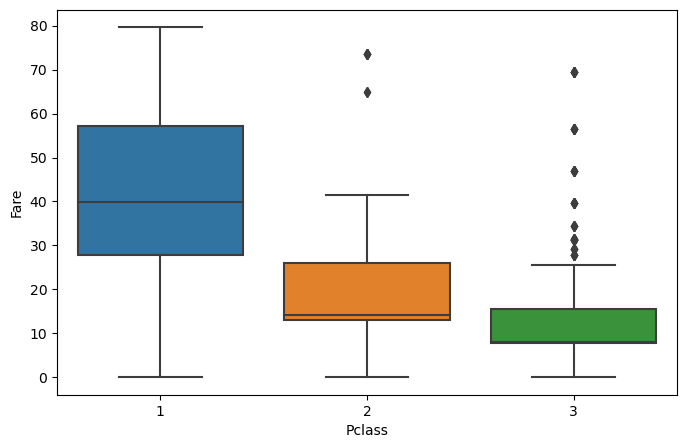

In [28]:
plt.figure(figsize=(8,5))
sn.boxplot(x='Pclass',y='Fare',data=train_df)

<Axes: xlabel='Survived', ylabel='Fare'>

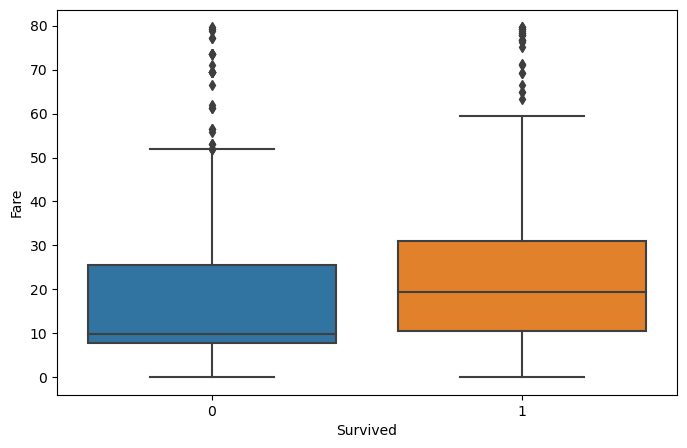

In [29]:
plt.figure(figsize=(8,5))
sn.boxplot(x='Survived',y='Fare',data=train_df)

In [30]:
train_df

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_group
0,0,3,1,1,0,7.2500,2,1
1,1,1,0,1,0,71.2833,0,2
2,1,3,0,0,0,7.9250,2,2
3,1,1,0,1,0,53.1000,2,2
4,0,3,1,0,0,8.0500,2,2
...,...,...,...,...,...,...,...,...
886,0,2,1,0,0,13.0000,2,2
887,1,1,0,0,0,30.0000,2,1
888,0,3,0,1,2,23.4500,2,2
889,1,1,1,0,0,30.0000,0,2


In [31]:
X_train=train_df.drop(columns='Survived')
Y_train=train_df['Survived']

In [32]:
X_train.shape,Y_train.shape

((815, 7), (815,))

In [33]:
from sklearn.tree import DecisionTreeClassifier
survival_model=DecisionTreeClassifier()
survival_model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [34]:
survival_model.score(X_train,Y_train)

0.9349693251533743

In [35]:
y_predicted=survival_model.predict(test_df)
y_predicted

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [36]:
y_test=test_true['Survived']

In [37]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [38]:
accuracy=accuracy_score(y_test,y_predicted)
accuracy

0.8373205741626795

In [39]:
cm=confusion_matrix(y_test,y_predicted)
print(cm)

[[229  37]
 [ 31 121]]


In [40]:
class_report=classification_report(y_test,y_predicted)
print(class_report)

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       266
           1       0.77      0.80      0.78       152

    accuracy                           0.84       418
   macro avg       0.82      0.83      0.83       418
weighted avg       0.84      0.84      0.84       418



In [41]:
from sklearn.ensemble import RandomForestClassifier
survival_model_forest=RandomForestClassifier(n_estimators=20)
survival_model_forest.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=20)

In [42]:
survival_model_forest.score(X_train,Y_train)

0.9312883435582822

In [43]:
y_predicted_forest=survival_model_forest.predict(test_df)
y_predicted_forest

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
accuracy_forest=accuracy_score(y_test,y_predicted_forest)
accuracy_forest

0.854066985645933

In [46]:
cm_forest=confusion_matrix(y_test,y_predicted_forest)
cm_forest

array([[235,  31],
       [ 30, 122]], dtype=int64)

In [47]:
class_report_forest=classification_report(y_test,y_predicted_forest)
print(class_report_forest)

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       266
           1       0.80      0.80      0.80       152

    accuracy                           0.85       418
   macro avg       0.84      0.84      0.84       418
weighted avg       0.85      0.85      0.85       418

